Converged at iteration no. 5


,Elevation [m],Settlement [m]
0,0.0,-0.168192
1,-0.1,-0.168192
2,-0.2,-0.168192
3,-0.3,-0.168191
4,-0.4,-0.168191
5,-0.5,-0.168191
6,-0.6,-0.168191
7,-0.7,-0.168191
8,-0.8,-0.168191
9,-0.9,-0.168191


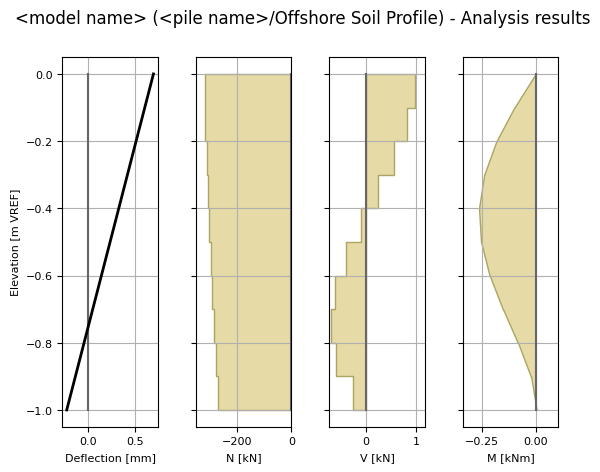

In [1]:
from openpile.construct import Pile, SoilProfile, Layer, Model
from openpile.soilmodels import API_clay, API_sand, API_clay_axial, API_sand_axial


p = Pile.create_tubular(
    name="<pile name>", top_elevation=0, bottom_elevation=-1, diameter=2.0, wt=1.0
)

# Create a 40m deep offshore Soil Profile with a 15m water column
sp = SoilProfile(
    name="Offshore Soil Profile",
    top_elevation=0,
    water_line=-15,
    layers=[
        Layer(
            name="medium dense sand",
            top=0,
            bottom=-20,
            weight=18,
            lateral_model=API_sand(phi=33, kind="cyclic"),
            # axial_model=API_sand_axial(delta=35),
            axial_model=API_clay_axial(Su=10, tension_multiplier=0.5),

        ),
        Layer(
            name="firm clay",
            top=-20,
            bottom=-40,
            weight=18,
            lateral_model=API_clay(Su=[50, 70], eps50=0.015, kind="cyclic"),
            axial_model=API_clay_axial(Su=70),
        ),
    ],
)

# Create Model
M = Model(name="<model name>", pile=p, soil=sp, coarseness=0.1)

# Apply bottom fixity along x-axis
#M.set_support(elevation=-2, Rz=True)
# Apply axial and lateral loads
M.set_pointload(elevation=0, Py=1, Pz=-320)
#M.set_pointdisplacement(elevation=-0.0, Tz=0.008)

# Run analysis
import matplotlib.pyplot as plt

Result = M.solve()

# plot the results
Result.plot()
Result.settlement

In [2]:
p.inner_volume/3.1415

0.0

In [3]:
f"{M.entrapped_soil_weight=}"

'M.entrapped_soil_weight=0.0'

In [4]:
f"{p.weight=}"

'p.weight=245.04422698000386'

In [5]:
# last shaft resistance values (for compression)m
M._tz_springs[-1,:,0,:]

array([[ 35.98735 ,  35.98735 ,  39.98595 ,  35.98735 ,  29.989464,
         19.992975,  11.995785,  -0.      , -23.99157 , -39.98595 ,
        -59.978928, -71.9747  , -79.9719  , -71.9747  , -71.9747  ],
       [ 37.934   ,  37.934   ,  42.148888,  37.934   ,  31.611666,
         21.074444,  12.644667,  -0.      , -25.289333, -42.148888,
        -63.22333 , -75.868   , -84.297775, -75.868   , -75.868   ]],
      dtype=float32)

In [7]:
M.shaft_resistance

(59.90190570354462, 29.95095285177231)